# Lab 1 

In [1]:
import numpy as np
import pandas as pd
import scipy

import ugradio
import ugradio.pico as pico
import ugradio.dft as dft

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

In [34]:
imported_data = np.load("data.npz")
sig_a_data = imported_data["arr_0"][0,0,:200]
sig_b_data = imported_data["arr_0"][1,0,:200]
data_length = len(sig_a_data)
N = 1
sampling_frequency_Hz = 62.5e6/N #cool 
delta_t = 1/sampling_frequency_Hz
total_time = delta_t * data_length  
times = np.arange(0, total_time, delta_t)
# dft.dft
dft_sig_a = dft.dft(sig_a_data, vsamp=62500000)[1]
dft_sig_b = dft.dft(sig_b_data, vsamp=62500000)[1]

ft_time = dft.dft(sig_a_data, vsamp=62500000)[0]
ft_time1= ft_time/10**6 #unit conversion to MHz

# numpy.fft.fft
fft_sig_a = np.fft.fft(sig_a_data)
fft_sig_a = np.fft.fftshift(fft_sig_a)

fft_sig_b = np.fft.fft(sig_b_data)
fft_sig_b = np.fft.fftshift(fft_sig_b)
power_ft_sig_a = [abs(s)**2 for s in fft_sig_a]
power_ft_sig_b = [abs(s)**2 for s in fft_sig_b]

# noise data
noise_data = ugradio.pico.capture_data("1V", divisor=1, dual_mode=False, nblocks=32)

# mixer data
mixer_data = np.load('mixer.npy')
port_a_data = mixer_data[0,0][:200] # DSB IF output, product of LO and RF 
port_b_data = mixer_data[1,0][:200] # use both ports for SSB, port a is real component of output, port b is imaginary component

# ALIASING AND NYQUIST CRITERION

In [22]:
i = power_ft_sig_a.index(max(power_ft_sig_a))
sig_a_dft_frequency = abs(ft_time1[i])
print("Signal A frequency: " + str(sig_a_dft_frequency) + " MHz")

f_s = sampling_frequency_Hz/(N*(10**6))
f_max = sig_a_dft_frequency
alias_difference_a = 2*abs(f_s/2-f_max)
print("Satisfied Nyquist Criterion: " + str(f_s) + str(' > ') + str(2*f_max) + " " + str(f_s>2*f_max))
print("alias range: " + str(alias_difference_a))
print("Minimum Sampling Frequency (assuming no alias): " + str(f_max*2))
print("Other Possible Frequencies : " ) #62.5/2-f_max*N until < 0 and 62.5/2+f_max*N until > 2*f_S and 

Signal A frequency: 30.0 MHz
Satisfied Nyquist Criterion: 62.5 > 60.0 True
alias range: 2.5
Minimum Sampling Frequency (assuming no alias): 60.0
Other Possible Frequencies : 


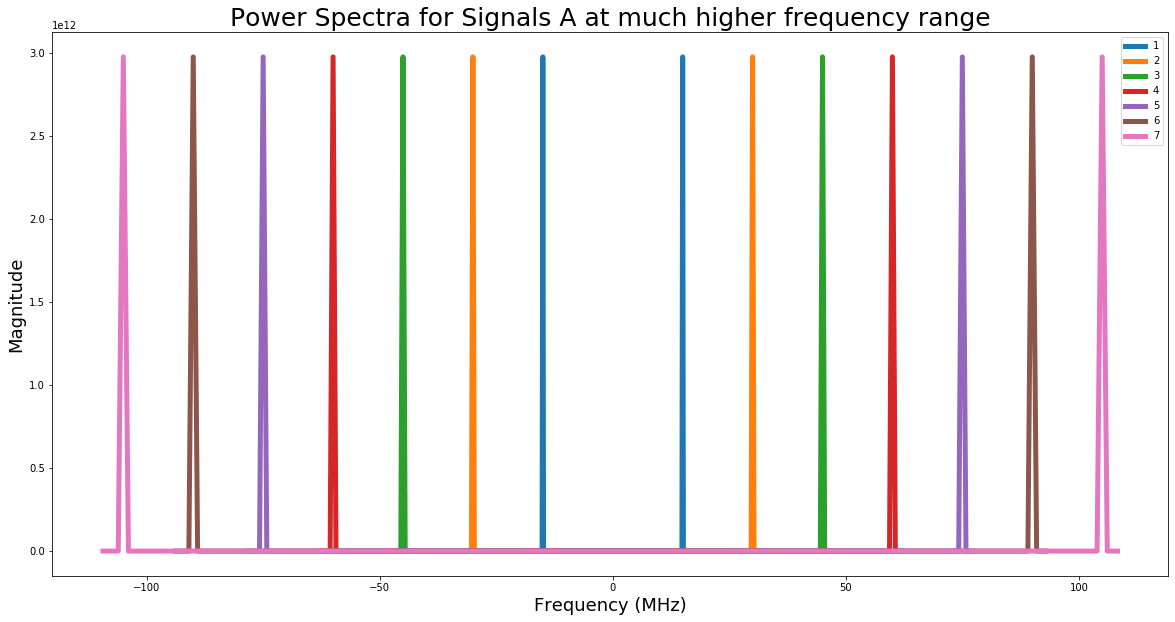

In [29]:
plt.figure(figsize=(20,10))
for W in range(1,8):
    dft_sig_a_window = dft.dft(sig_a_data, vsamp=62.5e6*W/2)[1]
    ft_time = dft.dft(dft_sig_a_window, vsamp=62.5e6*W/2)[0]
    ft_time1 = ft_time/10**6 #unit conversion to MHz
    
    power_sig_a_window = [abs(s)**2 for s in dft_sig_a_window]
    
    plt.plot(ft_time1, power_sig_a_window, linewidth=5, label=W)
    plt.xlabel("Frequency (MHz)", fontsize=18)
    plt.ylabel("Magnitude", fontsize=18)
    plt.title("Power Spectra for Signals A at much higher frequency range", fontsize=25)
    plt.legend()
    # at higher ranges, frequency peaks exist at fs +- N(fs/2)

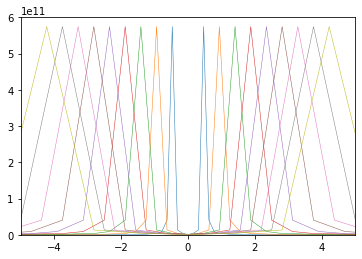

In [35]:
# this isn't meaningful. change divisor instead. 
for N in range (1,10):
    mixer_a_dft = dft.dft(port_a_data, vsamp=62.5e6*N/2)[1]
    mixer_b_dft = dft.dft(port_b_data, vsamp=62.5e6*N/2)[1]
    mixer_a_time = dft.dft(port_a_data, vsamp=62.5e6*N/2)[0]
    mixer_b_time = dft.dft(port_b_data, vsamp=62.5e6*N/2)[0]
    power_mixer_a = [abs(s)**2 for s in mixer_a_dft]
    power_mixer_b = [abs(s)**2 for s in mixer_b_dft]
    plt.plot(mixer_a_time/1e6, power_mixer_a, linewidth=0.5)
    plt.xlim(-5,5)
    plt.ylim(0,6e11)
# resolution gets lower as it gets wider cuz as N gets bigger theres less samples
# use this code for 5.6
# also plot in log scale

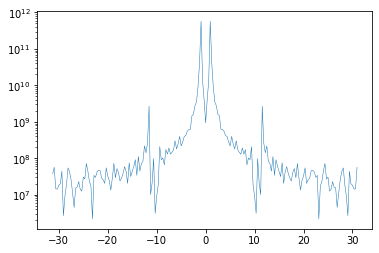

In [36]:
mixer_a_time, mixer_a_dft = dft.dft(port_a_data, vsamp=62.5e6)
power_mixer_a = [abs(s)**2 for s in mixer_a_dft]
plt.yscale('log')
plt.plot(mixer_a_time/1e6, power_mixer_a, linewidth=0.5)

#regularly spaced intervals

# SAMPLING

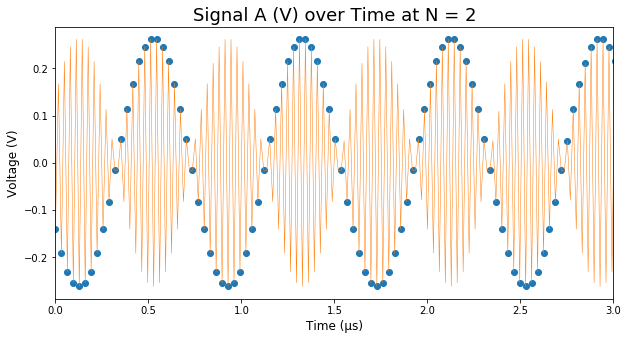

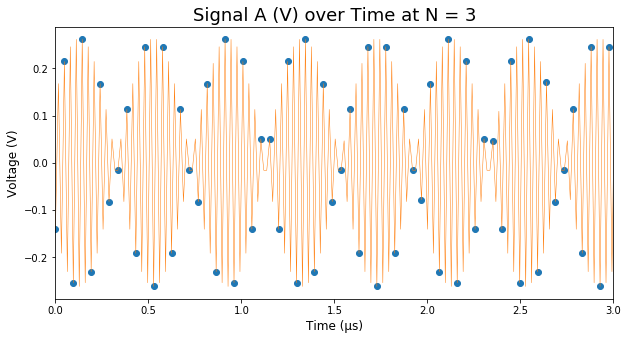

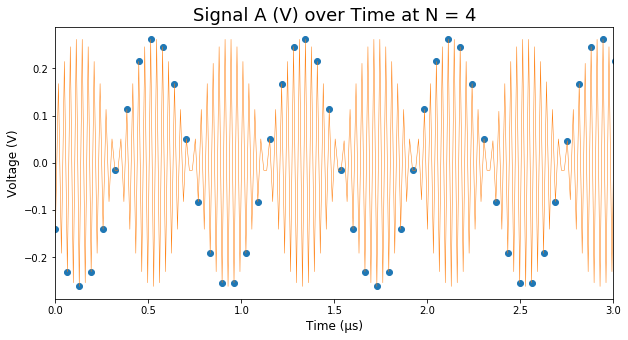

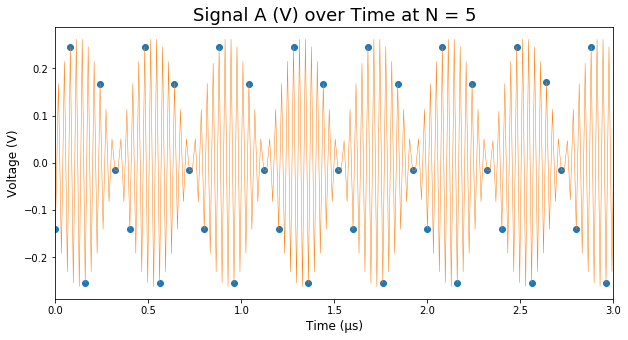

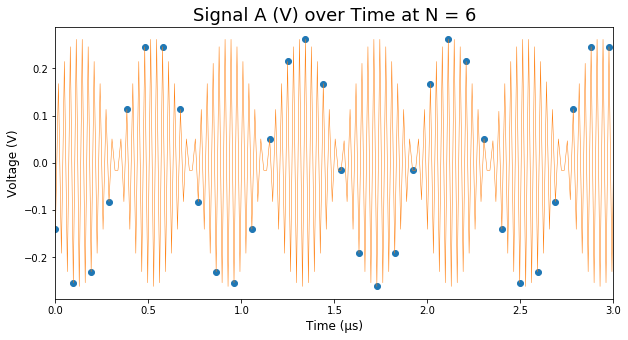

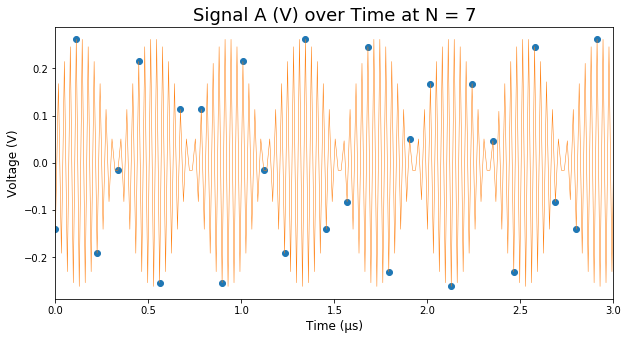

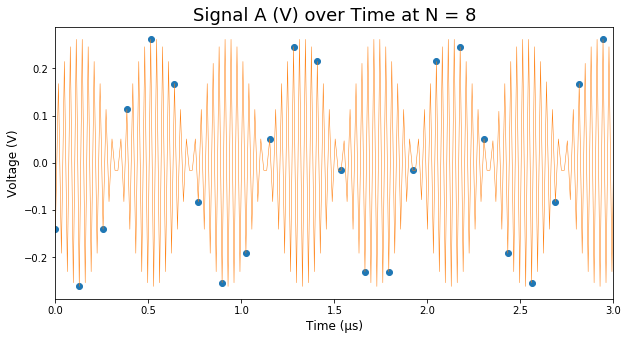

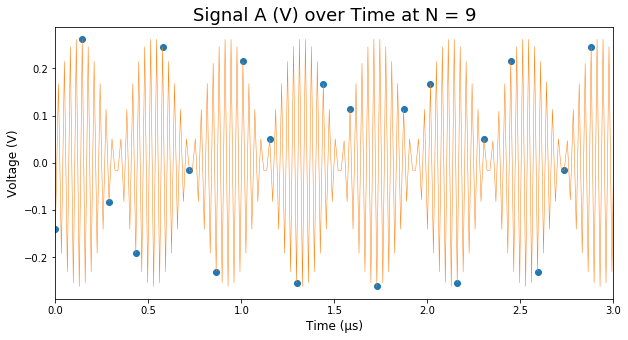

In [17]:
for j in range(2, 10):
    sig_a_data_1 = imported_data["arr_0"][0,0, :200*j]
    sig_b_data_1 = imported_data["arr_0"][1,0, :200*j]
    sig_a_data_2 = sig_a_data_1[::j]
    sig_b_data_2 = sig_b_data_1[::j]
    ft_time_2 = dft.dft(sig_a_data_2, vsamp=62500000/(j))[0]
    ft_time1_2 = ft_time_2/10**6 #unit conversion to MHz

    data_length = len(sig_a_data_2)
    sampling_frequency_Hz_N = sampling_frequency_Hz/(j) 
    delta_t = 1/sampling_frequency_Hz_N
    total_time = delta_t * data_length  
    times_2 = np.arange(0, total_time, delta_t)

    plt.figure(figsize=(10,5))
    plt.xlim(0, 3)
    plt.xlabel("Time (μs)", fontsize=12)
    plt.ylabel("Voltage (V)", fontsize=12)
    plt.title("Signal A (V) over Time at N = " + str(j), fontsize=18)
    plt.plot(times_2*(10**6), sig_a_data_2/(2**16), "o", linewidth=2)
    plt.plot(times*(10**6), sig_a_data/(2**16), linewidth=.5)

# RESOLUTION

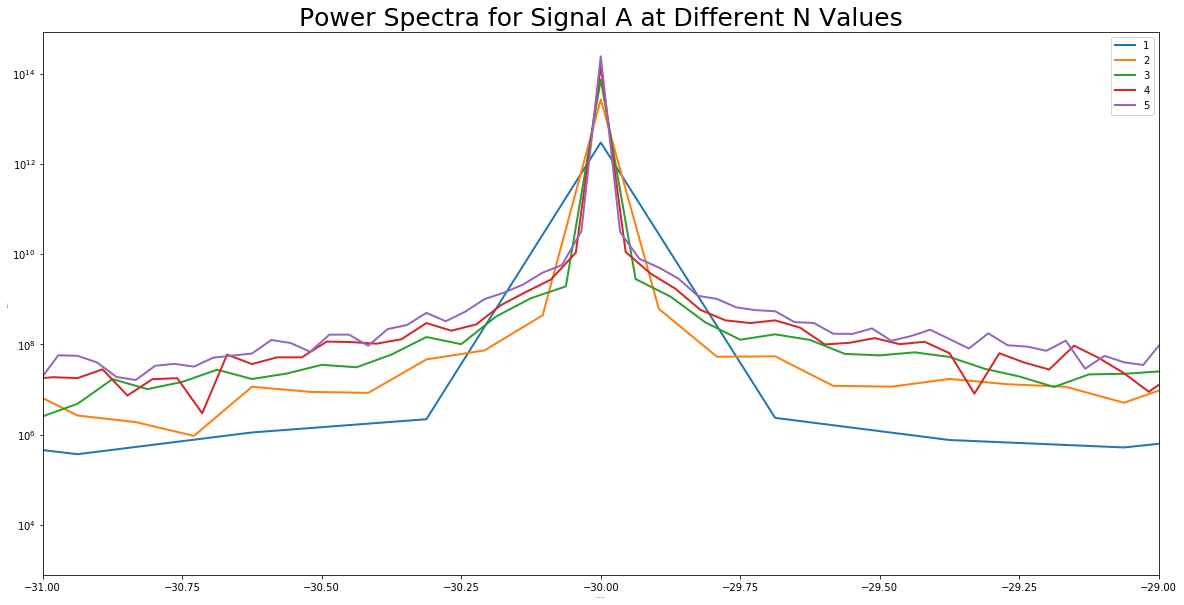

In [27]:
# spectral leakage
plt.figure(figsize=(20,10))
for N in range(1,10,2):
    # dft.dft
    sig_a_leak = imported_data["arr_0"][0,0, :200*N]
    sig_b_leak = imported_data["arr_0"][1,0, :200*N]
    
    dft_sig_a_leak = dft.dft(sig_a_leak, vsamp=62.5e6)[1]
    dft_sig_b_leak = dft.dft(sig_b_leak, vsamp=62.5e6)[1]

    ft_time = dft.dft(sig_b_leak, vsamp=62.5e6)[0]
    ft_time1= ft_time/10**6 #unit conversion to MHz

    power_dft_sig_a_leak = [abs(s)**2 for s in dft_sig_a_leak]
    power_dft_sig_b_leak = [abs(s)**2 for s in dft_sig_b_leak]
    
    plt.yscale('log')
    plt.plot(ft_time1, power_dft_sig_a_leak, linewidth=2)
    #plt.plot(ft_time1, power_dft_sig_b_leak, 'r', linewidth=5)
    plt.legend([x for x in range(1,10)])
    plt.xlabel("Frequency (MHz)", fontsize=1)
    plt.ylabel("Magnitude", fontsize=1)
    plt.title("Power Spectra for Signal A at Different N Values", fontsize=25)
    plt.xlim(-31, -29) # zooms into one peak to show how peak gets narrower with more samples
    #plt.ylim(-25000,25000)

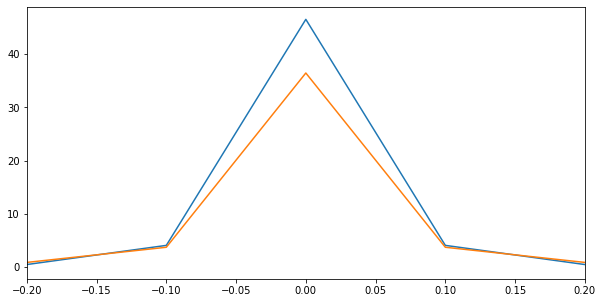

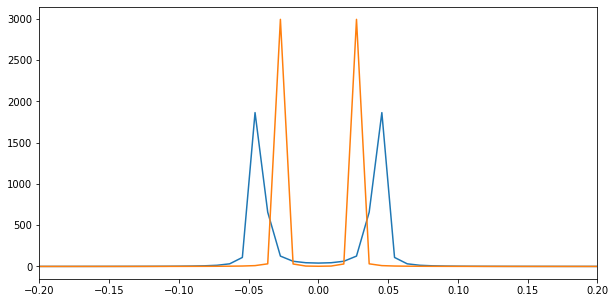

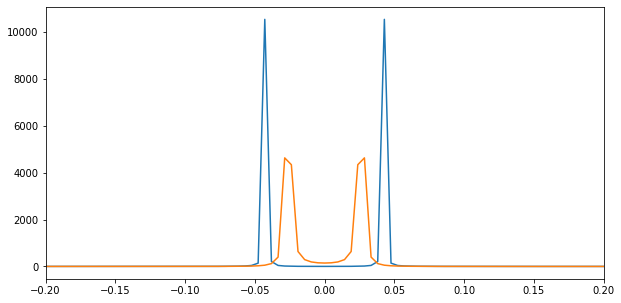

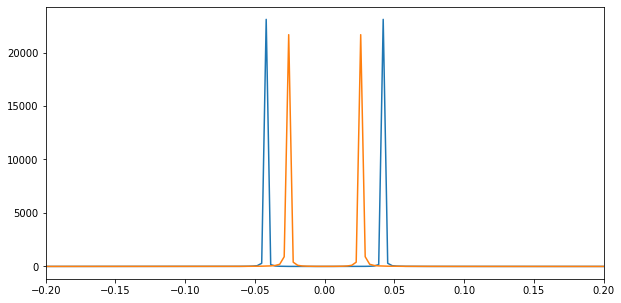

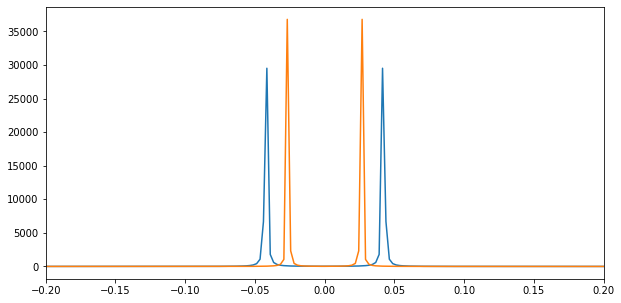

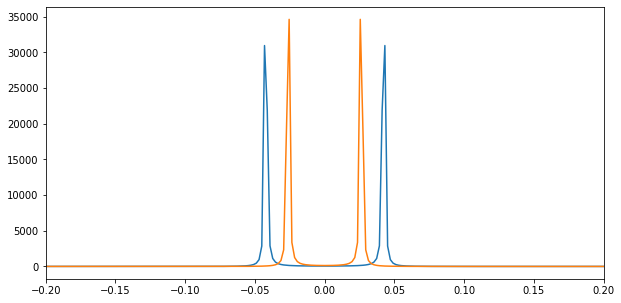

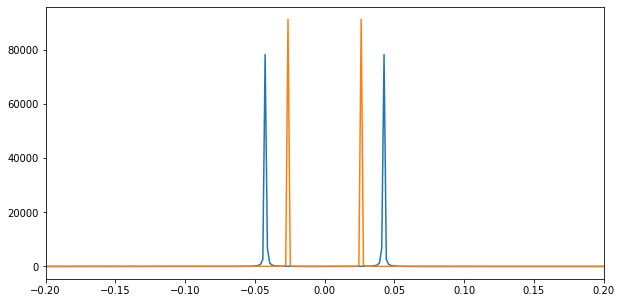

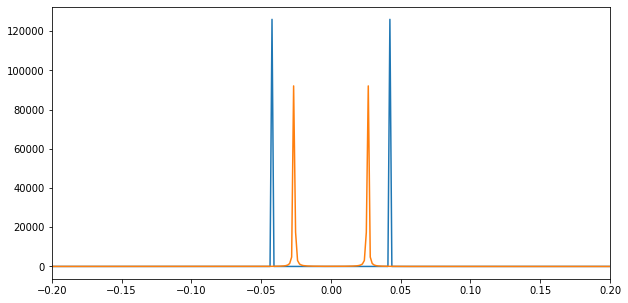

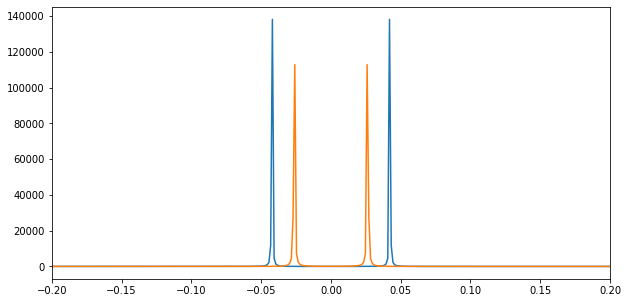

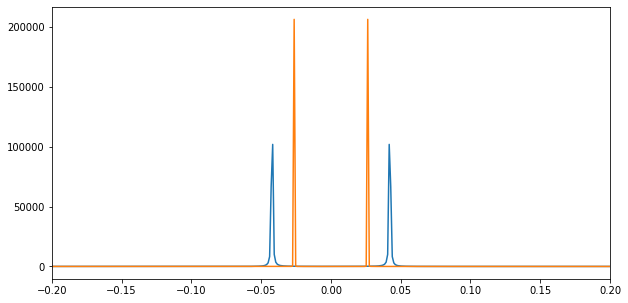

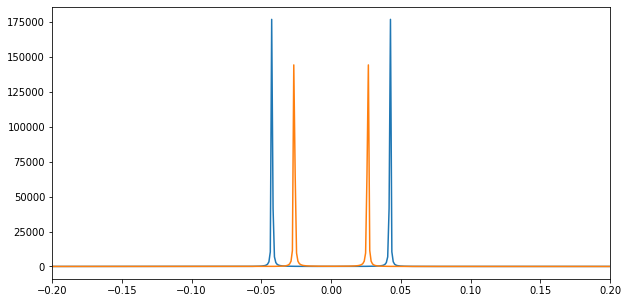

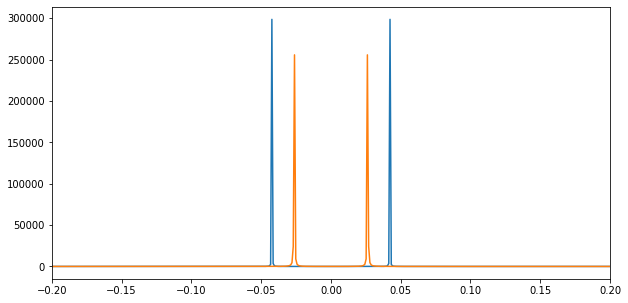

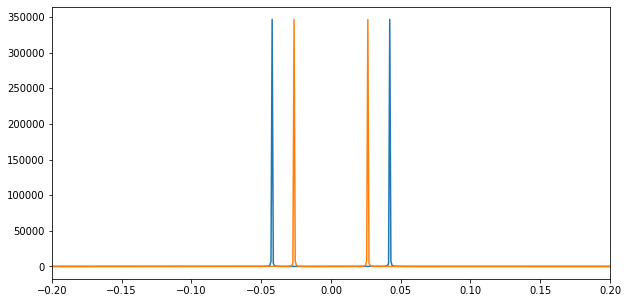

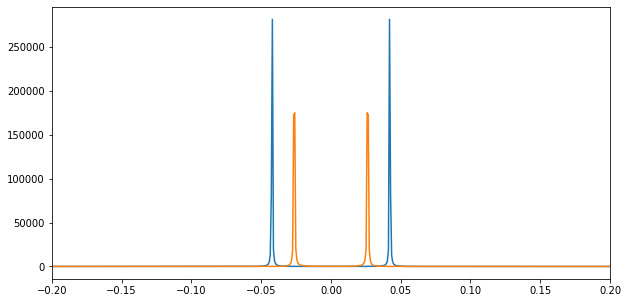

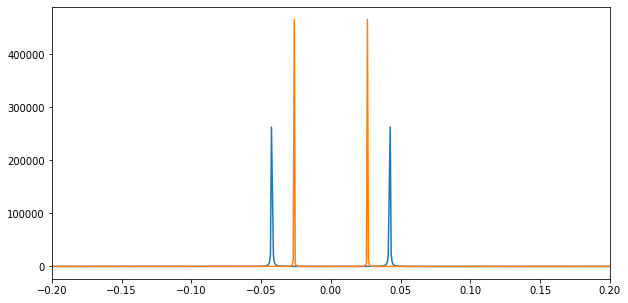

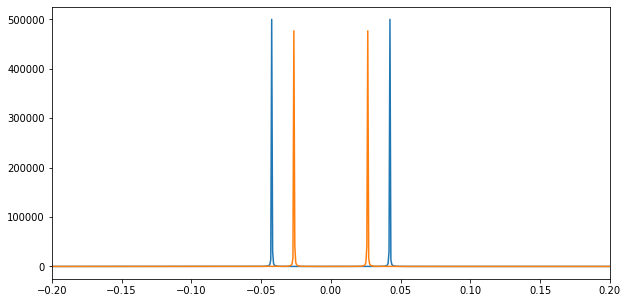

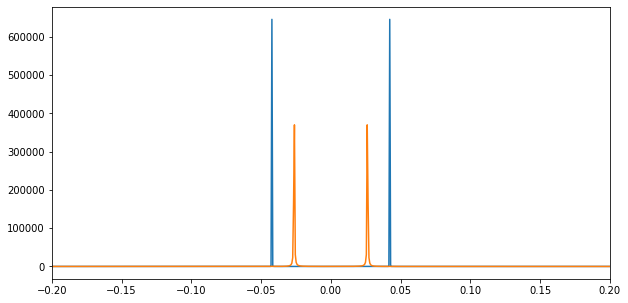

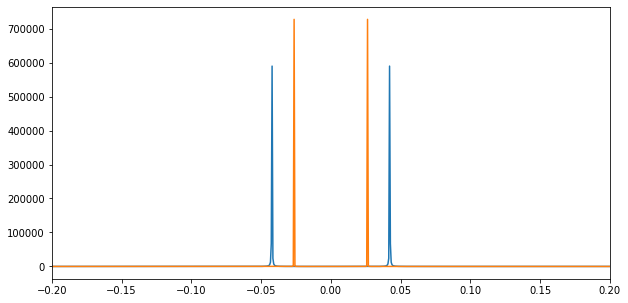

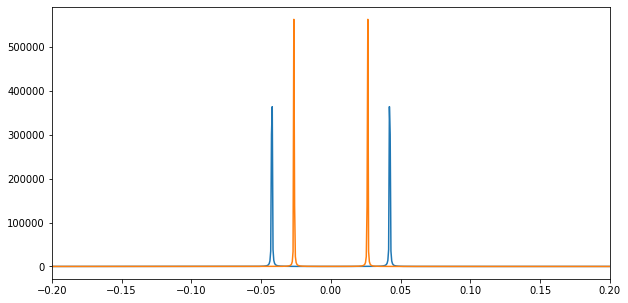

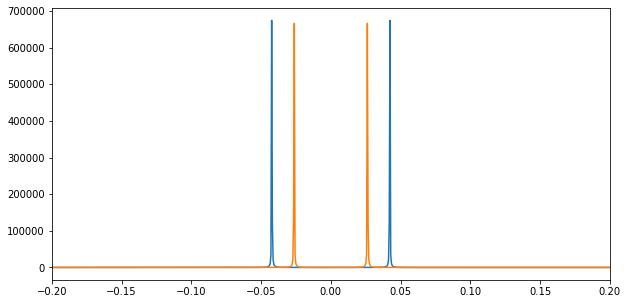

In [28]:
# frequency resolution 

# for higher frequency, decrease N and increase time_interval
N = 1
for time_interval in range(10,2000,100):
    nu_f = 50
    nu_g = 50.1
    
    delta_nu_f = nu_f/N
    delta_nu_g = nu_g/N
    delta_nu = abs(nu_f-nu_g)
    
    f = [np.sin(nu_f*t) for t in range(0,time_interval, N)]
    g = [np.sin(nu_g*t) for t in range(0,time_interval, N)]
    #print("frequency difference < delta nu : " + str(delta_nu_f > delta_nu and delta_nu_g > delta_nu))

    dft_f = dft.dft(f, vsamp=len(f)/(time_interval))[1]
    dft_g = dft.dft(g, vsamp=len(g)/(time_interval))[1]

    ft_time = dft.dft(f, vsamp=len(f)/(time_interval))[0]
    ft_time1= ft_time/10**6 #unit conversion to MHz

    power_dft_f = [abs(s)**2 for s in dft_f]
    power_dft_g = [abs(s)**2 for s in dft_g]

    plt.figure(figsize=(10,5))
    plt.plot(ft_time, power_dft_f)
    plt.plot(ft_time, power_dft_g)
    plt.xlim(-.2,.2)
    
    i = power_dft_f.index(max(power_dft_f))
    f_freq = abs(ft_time[i])
    
    j = power_dft_g.index(max(power_dft_g))
    g_freq = abs(ft_time[j])
    
    #print("Frequency Resolution: " + str(abs(f_freq-g_freq)))
    #resolution_array.append(abs(f_freq-g_freq))
    
    # MAKE RESOLUTION ARRAY AND PLOT AGAIN
    # PROVE THAT DELTA NU IS THE SMALLEST FREQUENCY DIFFERENCE YOU CAN  DETECT

# FOURIER FILTERING AND NOISE

In [26]:
imported_secret_message = np.load("secret_message.npz")
secret_message_data = imported_secret_message['data']
# take the ft, plot power spectra, find frequencies, identify higher frequencies, 
# and then replace fft values that fall on that frequency value with 0, and then take inverse fourier, and then re plot

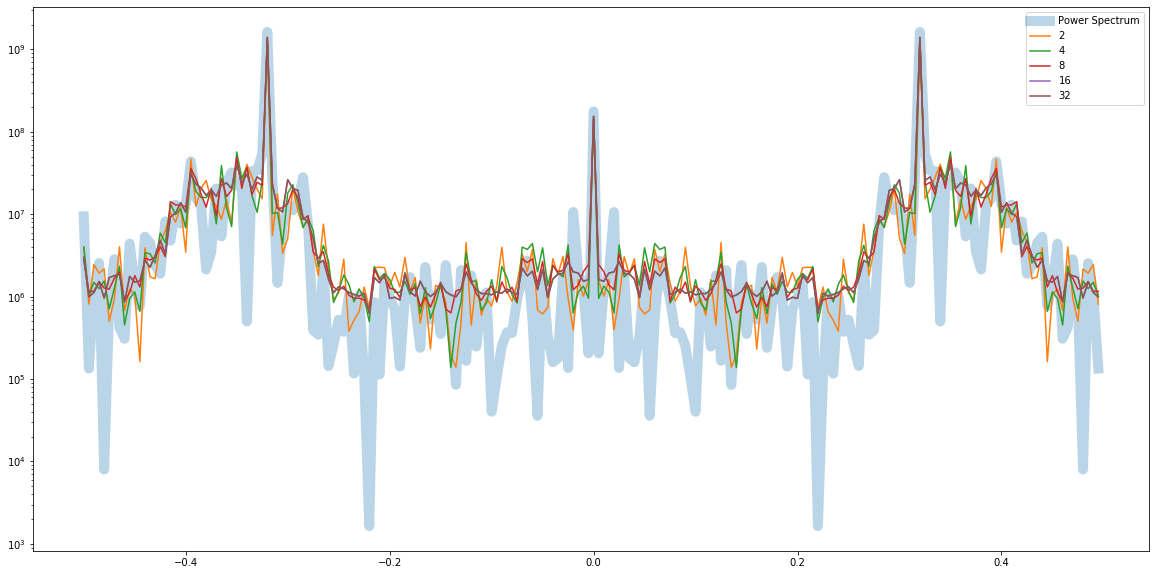

In [32]:
block_power_spectra = {}
for n in range(0, 32):
    d = noise_data[0][n][:200]
    d_fft = dft.dft(d)[1]
    noise_power_spectrum = [abs(s)**2 for s in d_fft]
    block_power_spectra[n] = noise_power_spectrum
## take the average power spectra over all blocks, and then over N blocks : [array of averages]. log scale. 

# take average of N blocks 
n_avg = []
for n_blocks in [2, 4, 8, 16, 32]:
    n_noise_power_blocks = []
    for n in range(0, n_blocks):
        n_noise_power_blocks.append(block_power_spectra[n])
    n_avg.append(np.mean(n_noise_power_blocks, axis=0))
    
block = 12
ft_time = dft.dft(noise_data[0][block][:200])[0]
plt.figure(figsize=(20,10))
plt.plot(ft_time, block_power_spectra[block], label="Power Spectrum", linewidth=10, alpha=0.3)
plt.plot(ft_time, n_avg[0], label="2")
plt.plot(ft_time, n_avg[1], label="4")
plt.plot(ft_time, n_avg[2], label="8")
plt.plot(ft_time, n_avg[3], label="16")
plt.plot(ft_time, n_avg[3], label="32")
plt.legend()
plt.yscale("log")

# the more blocks you average, the smoother your curve should be. aka more samples is less noise.
# smoothing out noise is a type of filtering 

# MIXERS

# NEGATIVE FREQUENCIES

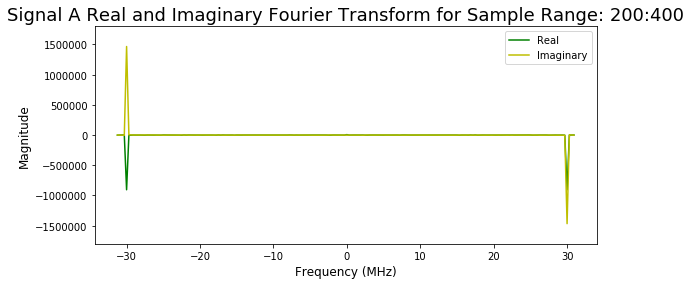

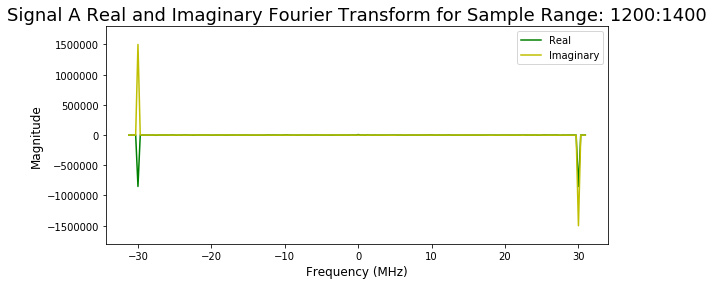

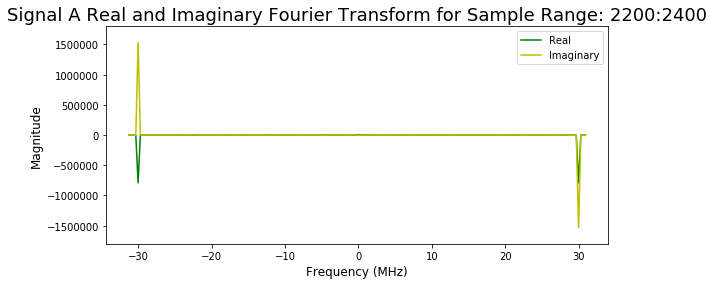

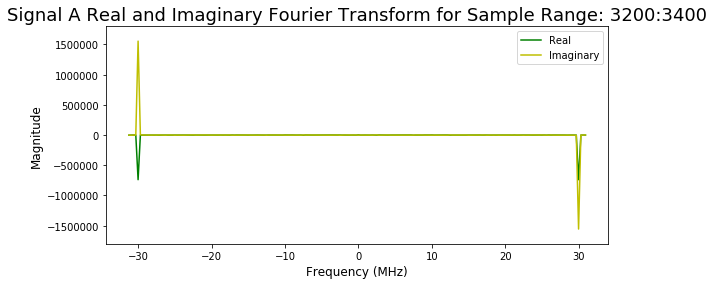

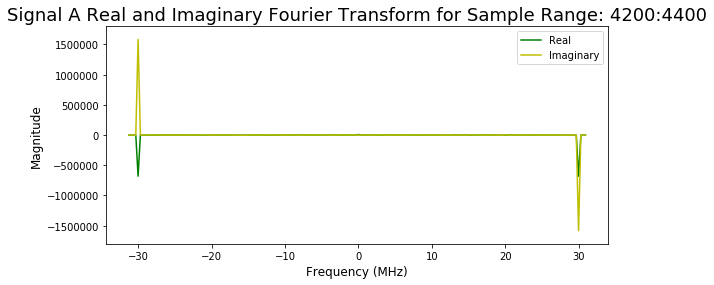

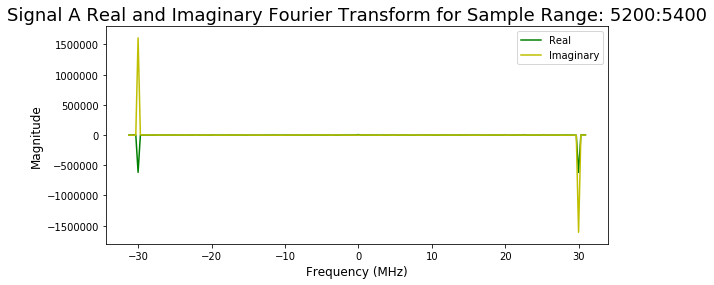

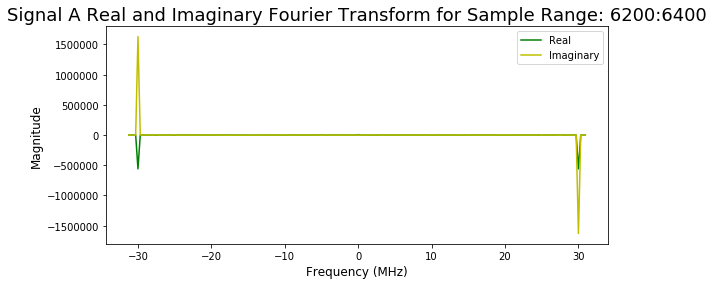

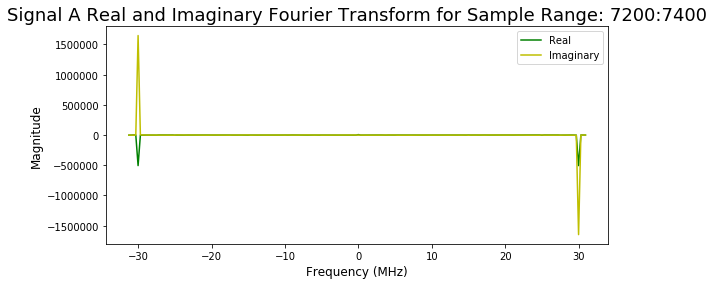

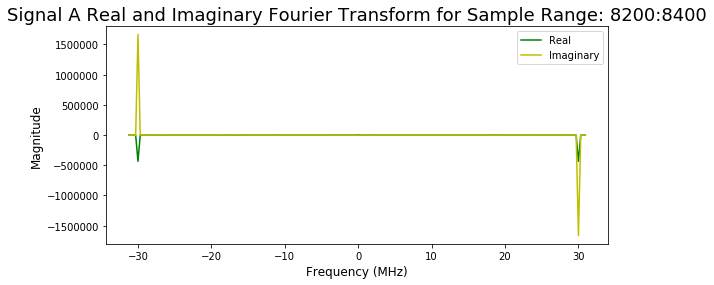

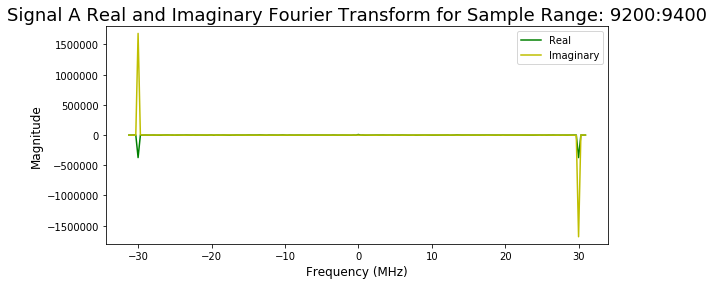

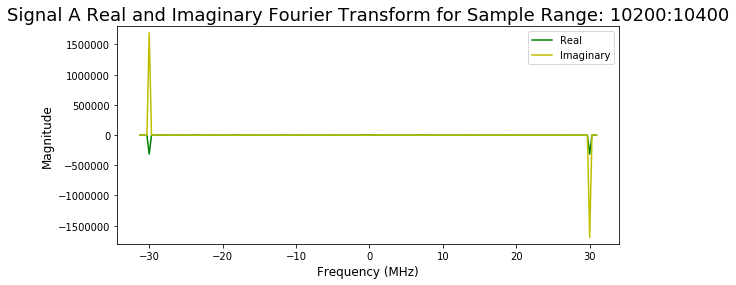

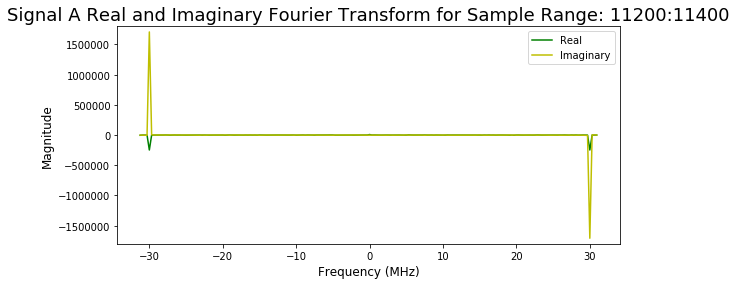

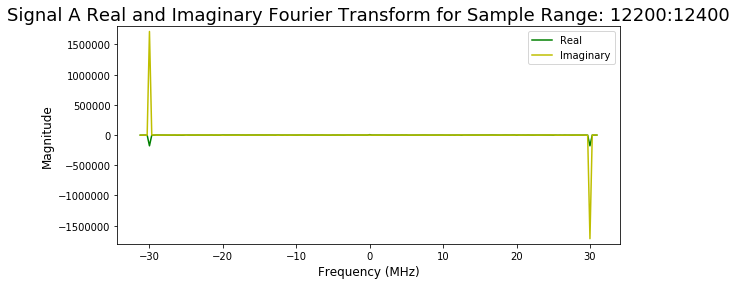

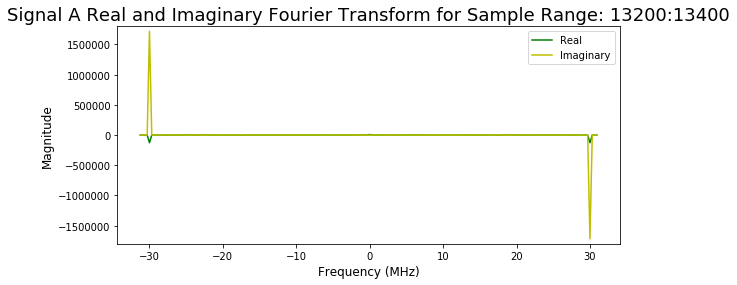

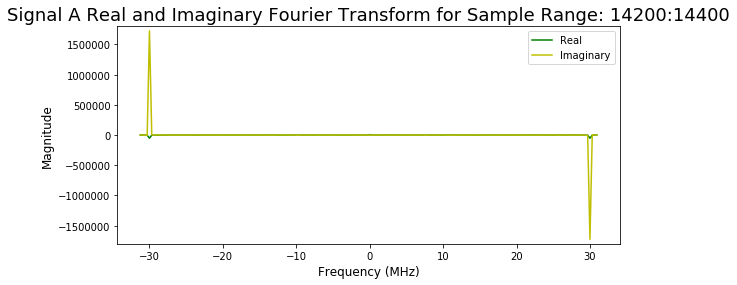

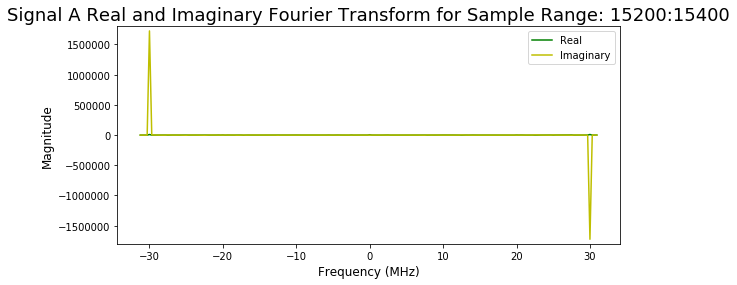

In [23]:
for i in range(200, 16000, 1000):
    sig_a_data_2 = imported_data["arr_0"][0,0, i:i+200]
    dft_sig_a_2 = dft.dft(sig_a_data_2, vsamp=62500000)[1]
    plt.figure(figsize=(9,4))
    #plt.xlim(-30, 30)
    plt.ylim(-1800000, 1800000)
    plt.plot(ft_time1, dft_sig_a_2.real, 'g')
    plt.plot(ft_time1, dft_sig_a_2.imag, 'y')
    plt.xlabel("Frequency (MHz)", fontsize=12)
    plt.ylabel("Magnitude", fontsize=12)
    plt.legend(["Real", "Imaginary"])
    plt.title("Signal A Real and Imaginary Fourier Transform for Sample Range: " + str(i)+ ":"+str(i+200), fontsize=18)

# CORRELATION AND CONVOLUTION

### auto correlation function and the effects of sampling on the results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  """


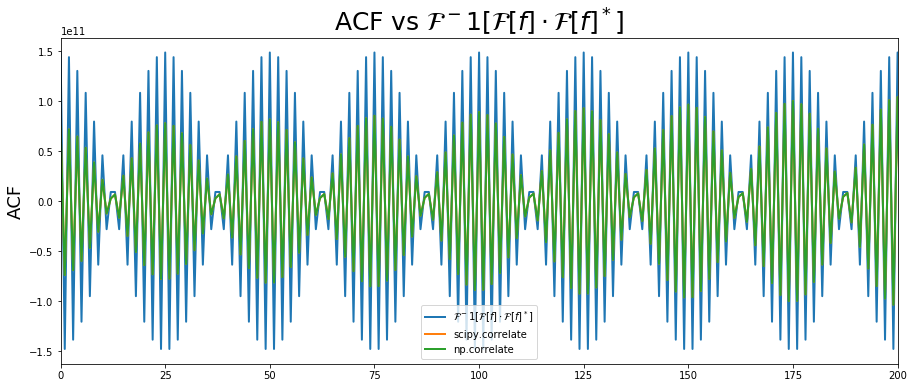

In [24]:
N = 1000 # number of samples
f = imported_data["arr_0"][0,0] # or secret_message_datavor idft_power_spectra_sig_a
f = f.astype(np.float64)[:N]
corr_numpy = np.correlate(f, f, mode='same')
corr_scipy = scipy.correlate(f, f, mode='same')
fft = np.fft.fft(f)
acf = np.fft.ifft(fft * fft.conj())

plt.figure(figsize=(15,6))
plt.plot(acf.real, label='$\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$', linewidth=2)
plt.plot(corr_scipy, label='scipy.correlate', linewidth=2)
plt.plot(corr_numpy, label ='np.correlate', linewidth=2)
plt.ylabel('ACF', fontsize=18)
plt.xlim(0,200)
plt.title("ACF vs $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()

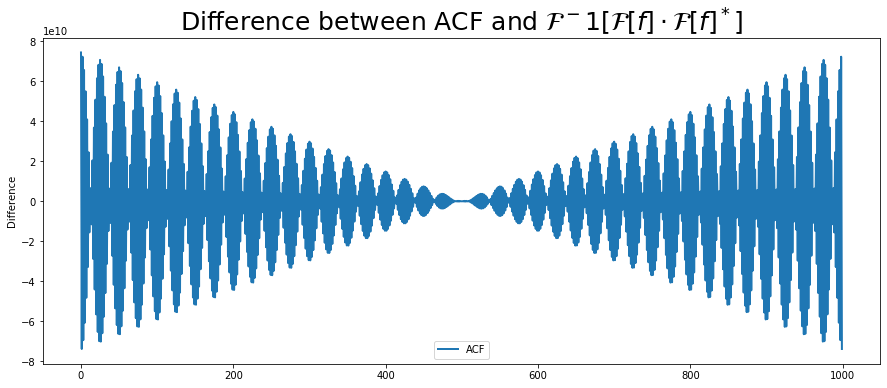

In [25]:
plt.figure(figsize=(15,6))
plt.plot(acf.real-corr_numpy, label='ACF', linewidth=2)
plt.ylabel('Difference')
plt.title("Difference between ACF and $\mathcal{F}^-1[\mathcal{F}[f] \cdot \mathcal{F}[f]^*]$", fontsize=25)
plt.legend()